On importe les librairies requises.

In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

On charge les données du fichier data.npy avec la fonction load de numpy.

In [18]:
data = np.load('data.npy')
print(data.shape)

(800, 6)


On se donne un aperçu des données avec lequel nous allons travailler.

In [19]:
data[0]

array([ -1.38188647,  -8.90671589,   0.63032934,   3.76533414,
         5.65632216, -13.05237528])

### Changement de dimensionalité

On réduit la dimensionalité avec TSNE

In [28]:
from sklearn.decomposition import PCA

pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)
data_reduced_2 = pca_2d.fit_transform(data)
data_reduced_3 = pca_3d.fit_transform(data)

In [33]:
from sklearn.manifold import TSNE

tsne_2d = TSNE(n_components=2)
tsne_3d = TSNE(n_components=3)
data_reduced_2 = tsne_2d.fit_transform(data)
data_reduced_3 = tsne_3d.fit_transform(data)

On affiche en 2D.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


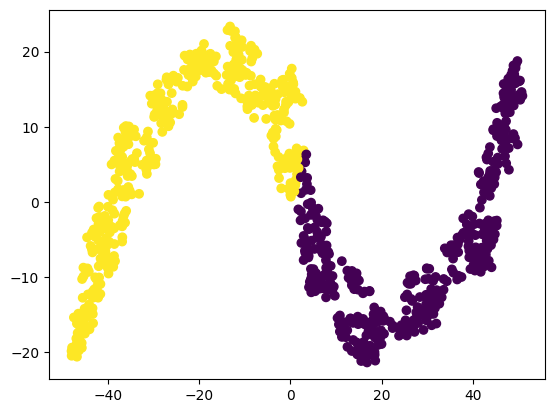

In [44]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(data_reduced_2)
plt.scatter(data_reduced_2[:, 0], data_reduced_2[:, 1], c=kmeans_labels)
plt.show()


On affiche aussi en 3D.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


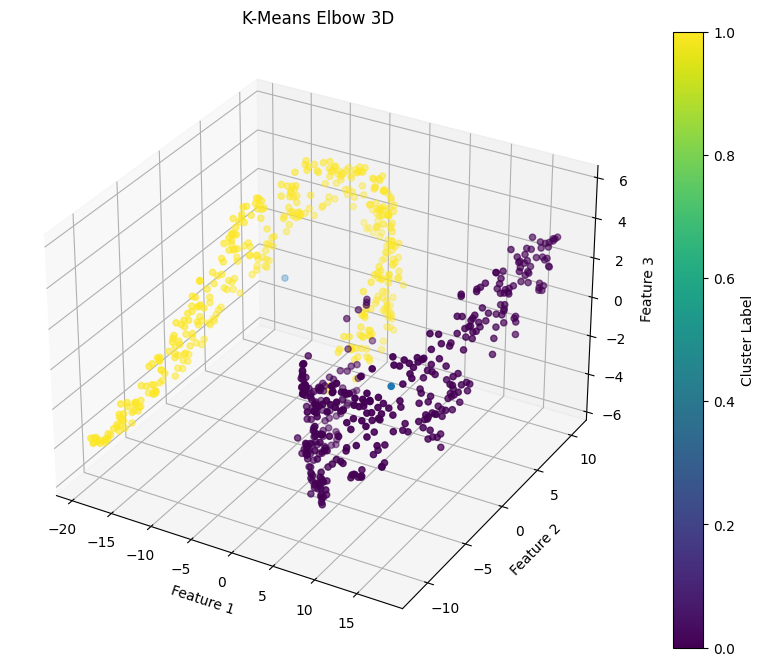

In [45]:
def plot_3d(data, optimal_k):
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    kmeans_labels = kmeans.fit_predict(data)
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=kmeans_labels, cmap='viridis')
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2])
    ax.set_title('K-Means Elbow 3D')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    fig.colorbar(scatter, ax=ax, label='Cluster Label')
    plt.show()

plot_3d(data_reduced_3, 2)

Le graphique en 3 dimensions semble nous permettre de mieux prédire la probabilité d'une tempete, car il nous permet de mieux comprendre la répartition des données dans l'espace.